<a href="https://colab.research.google.com/github/AyeshaJabeen10/ML-model-on-Insurance/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Import the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
#uploading the file
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [7]:
#reading the file
data = pd.read_csv("insurance.csv")

In [12]:
#to display first 5 rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
#to display the last 5 rows of the dataset
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [14]:
#to display the column names of dataset
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
#to know total no. of rows in a dataset
data.shape

(1338, 7)

In [8]:
#to know the datatype of the data present in dataset
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#to display over all information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#to check null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: ylabel='bmi'>

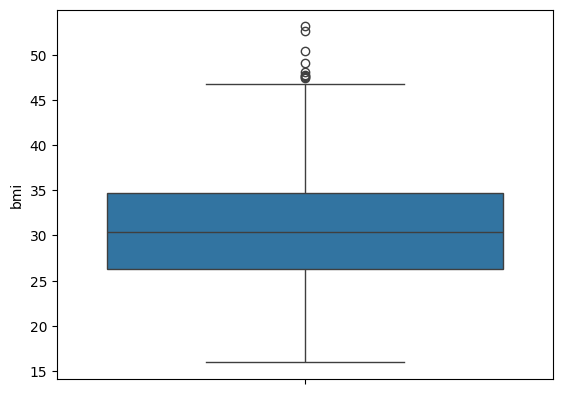

In [11]:
#to display the visual summary of the variability of values in dataset
sns.boxplot(data['bmi'])

In [12]:
IQR = data['bmi'].quantile(0.75)-data['bmi'].quantile(0.25)
IQR

8.3975

In [13]:
lowerBound=data['bmi'].quantile(0.25)-(1.5*IQR)
lowerBound

13.7

In [14]:
upperBound=data['bmi'].quantile(0.75)+(1.5*IQR)
upperBound

47.290000000000006

In [16]:
data['bmi']=np.where(data['bmi']>upperBound,upperBound,data['bmi'])

<Axes: ylabel='bmi'>

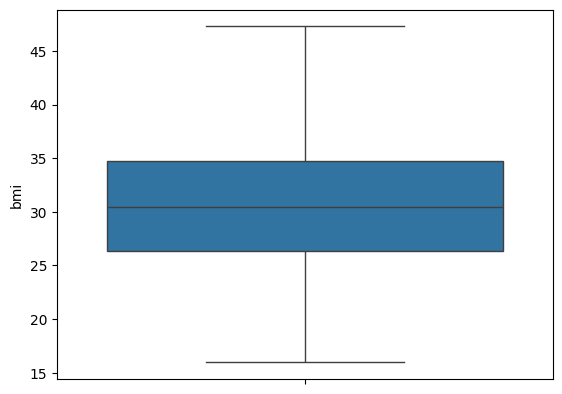

In [17]:
sns.boxplot(data['bmi'])

<Axes: ylabel='age'>

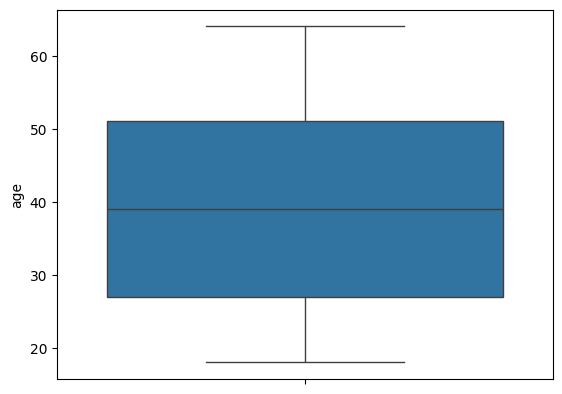

In [18]:
sns.boxplot(data['age'])

# **From the above boxplot we can see that there are NO OUTLIERS present in 'age'. Therefore the data is cleaned data.**

In [19]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [20]:
lb = LabelEncoder()

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
#to transform the data
data['sex'] = lb.fit_transform(data['sex'])
data['smoker'] = lb.fit_transform(data['smoker'])
data['region'] = lb.fit_transform(data['region'])

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Separating data**

In [28]:
#to drop the 'charges' column
x=data.drop(columns=['charges'],axis=1)
y=data["charges"]

In [29]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [30]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

**Scaling**

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()

In [34]:
X = sc.fit_transform(x)
X

array([[-1.43876426, -1.0105187 , -0.45420102, -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.51529985, -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38812512,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.02399878, -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.8010412 , -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.2609615 , -0.90861367,  1.97058663,
        -0.46691549]])

In [35]:
X = pd.DataFrame(x)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


**Splitting Data**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
x_train.head()

,age,sex,bmi,children,smoker,region
621,37,1,34.100,4,1,3
194,18,1,34.430,0,0,2
240,23,0,36.670,2,1,0
1168,32,1,35.200,2,0,3
1192,58,0,32.395,1,0,0


In [39]:
y_train.head()

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64

In [40]:
x_test.head()

,age,sex,bmi,children,smoker,region
578,52,1,30.200,1,0,3
610,47,0,29.370,1,0,2
569,48,1,40.565,2,1,1
1034,61,1,38.380,0,0,1
198,51,0,18.050,0,0,1


In [41]:
y_test.head()

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64

**Linear Regression**

In [42]:
#to predict the value of a dependent variable based on an independent variable
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred= lr.predict(x_test)
y_pred

array([ 1.10160603e+04,  9.77923984e+03,  3.80371234e+04,  1.61507863e+04,
        6.88293315e+03,  3.95067196e+03,  1.55123946e+03,  1.42956942e+04,
        8.95021753e+03,  7.44314397e+03,  4.50437538e+03,  1.02256118e+04,
        8.65146548e+03,  4.10852998e+03,  2.78244491e+04,  1.10218314e+04,
        1.12295093e+04,  6.05468839e+03,  8.17646090e+03,  2.70651298e+04,
        3.35621239e+04,  1.42697082e+04,  1.16839508e+04,  3.23986297e+04,
        4.44425117e+03,  9.18415186e+03,  1.08997992e+03,  1.00937120e+04,
        4.07628557e+03,  1.03609350e+04,  8.95258282e+03,  4.02848093e+04,
        1.54994342e+04,  1.36917690e+04,  2.47208893e+04,  5.12934575e+03,
        1.28727064e+04,  3.05630769e+04,  3.34394174e+04,  3.50793589e+03,
        3.96949616e+03,  4.28321470e+03,  3.04622802e+04,  3.93735907e+04,
        2.80418209e+04,  5.01890815e+03,  1.09122746e+04,  7.77082349e+03,
        3.58429161e+03,  1.05247646e+04,  5.65723135e+03,  3.37687152e+03,
        3.28442630e+04,  

In [46]:
from sklearn.metrics import r2_score
m = r2_score(y_pred,y_test)
m

0.7248156006571808